In [2]:
import pandas as pd

# Load the data
file_path = r'C:\Users\iamgu\Documents\GitHub\TCGA-LUAD\open_tggates_biochemistry.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows and basic info of the dataset for initial exploration
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23643 entries, 0 to 23642
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EXP_ID              23643 non-null  int64  
 1   GROUP_ID            23643 non-null  int64  
 2   INDIVIDUAL_ID       23643 non-null  int64  
 3   COMPOUND_NAME       23643 non-null  object 
 4   SINGLE_REPEAT_TYPE  23643 non-null  object 
 5   SACRIFICE_PERIOD    23643 non-null  object 
 6   DOSE                23643 non-null  int64  
 7   DOSE_UNIT           23643 non-null  object 
 8   DOSE_LEVEL          23643 non-null  object 
 9   ALP(IU/L)           23643 non-null  float64
 10  TC(mg/dL)           23643 non-null  float64
 11  TG(mg/dL)           23643 non-null  float64
 12  PL(mg/dL)           23643 non-null  float64
 13  TBIL(mg/dL)         23532 non-null  float64
 14  DBIL(mg/dL)         23531 non-null  float64
 15  GLC(mg/dL)          23643 non-null  float64
 16  BUN(

(None,
    EXP_ID  GROUP_ID  INDIVIDUAL_ID  COMPOUND_NAME SINGLE_REPEAT_TYPE  \
 0      40         1              1  acetaminophen             Single   
 1      40         1              2  acetaminophen             Single   
 2      40         1              3  acetaminophen             Single   
 3      40         1              4  acetaminophen             Single   
 4      40         1              5  acetaminophen             Single   
 
   SACRIFICE_PERIOD  DOSE DOSE_UNIT DOSE_LEVEL  ALP(IU/L)  ...  Cl(meq/L)  \
 0             3 hr     0     mg/kg    Control      877.0  ...      102.0   
 1             3 hr     0     mg/kg    Control      917.0  ...      106.0   
 2             3 hr     0     mg/kg    Control      751.0  ...      104.0   
 3             3 hr     0     mg/kg    Control      742.0  ...      104.0   
 4             3 hr     0     mg/kg    Control      923.0  ...      101.0   
 
    Ca(mg/dL)  IP(mg/dL)  TP(g/dL)  RALB(g/dL)  A/G  AST(IU/L)  ALT(IU/L)  \
 0       10.

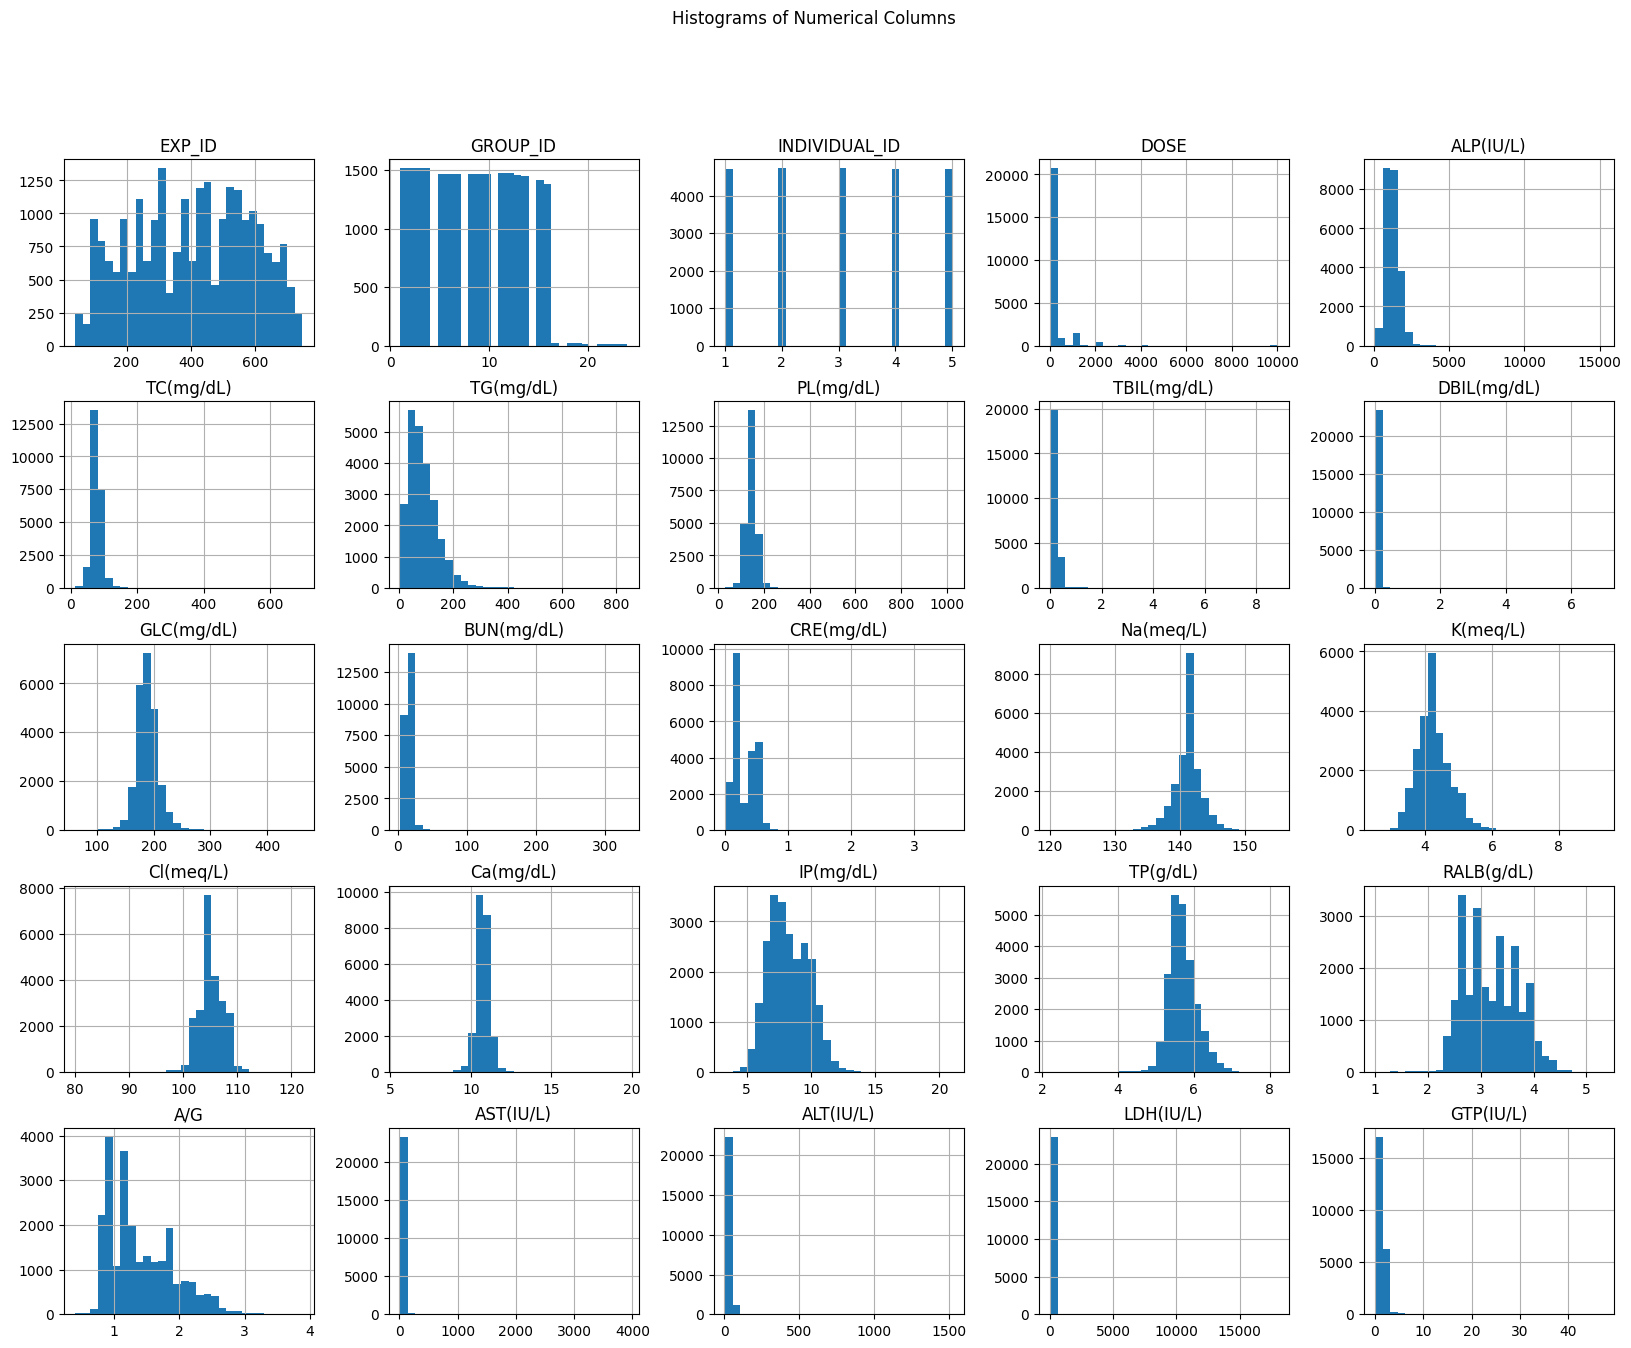

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical data
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns].hist(figsize=(20, 15), bins=30)
plt.suptitle('Histograms of Numerical Columns')
plt.show()



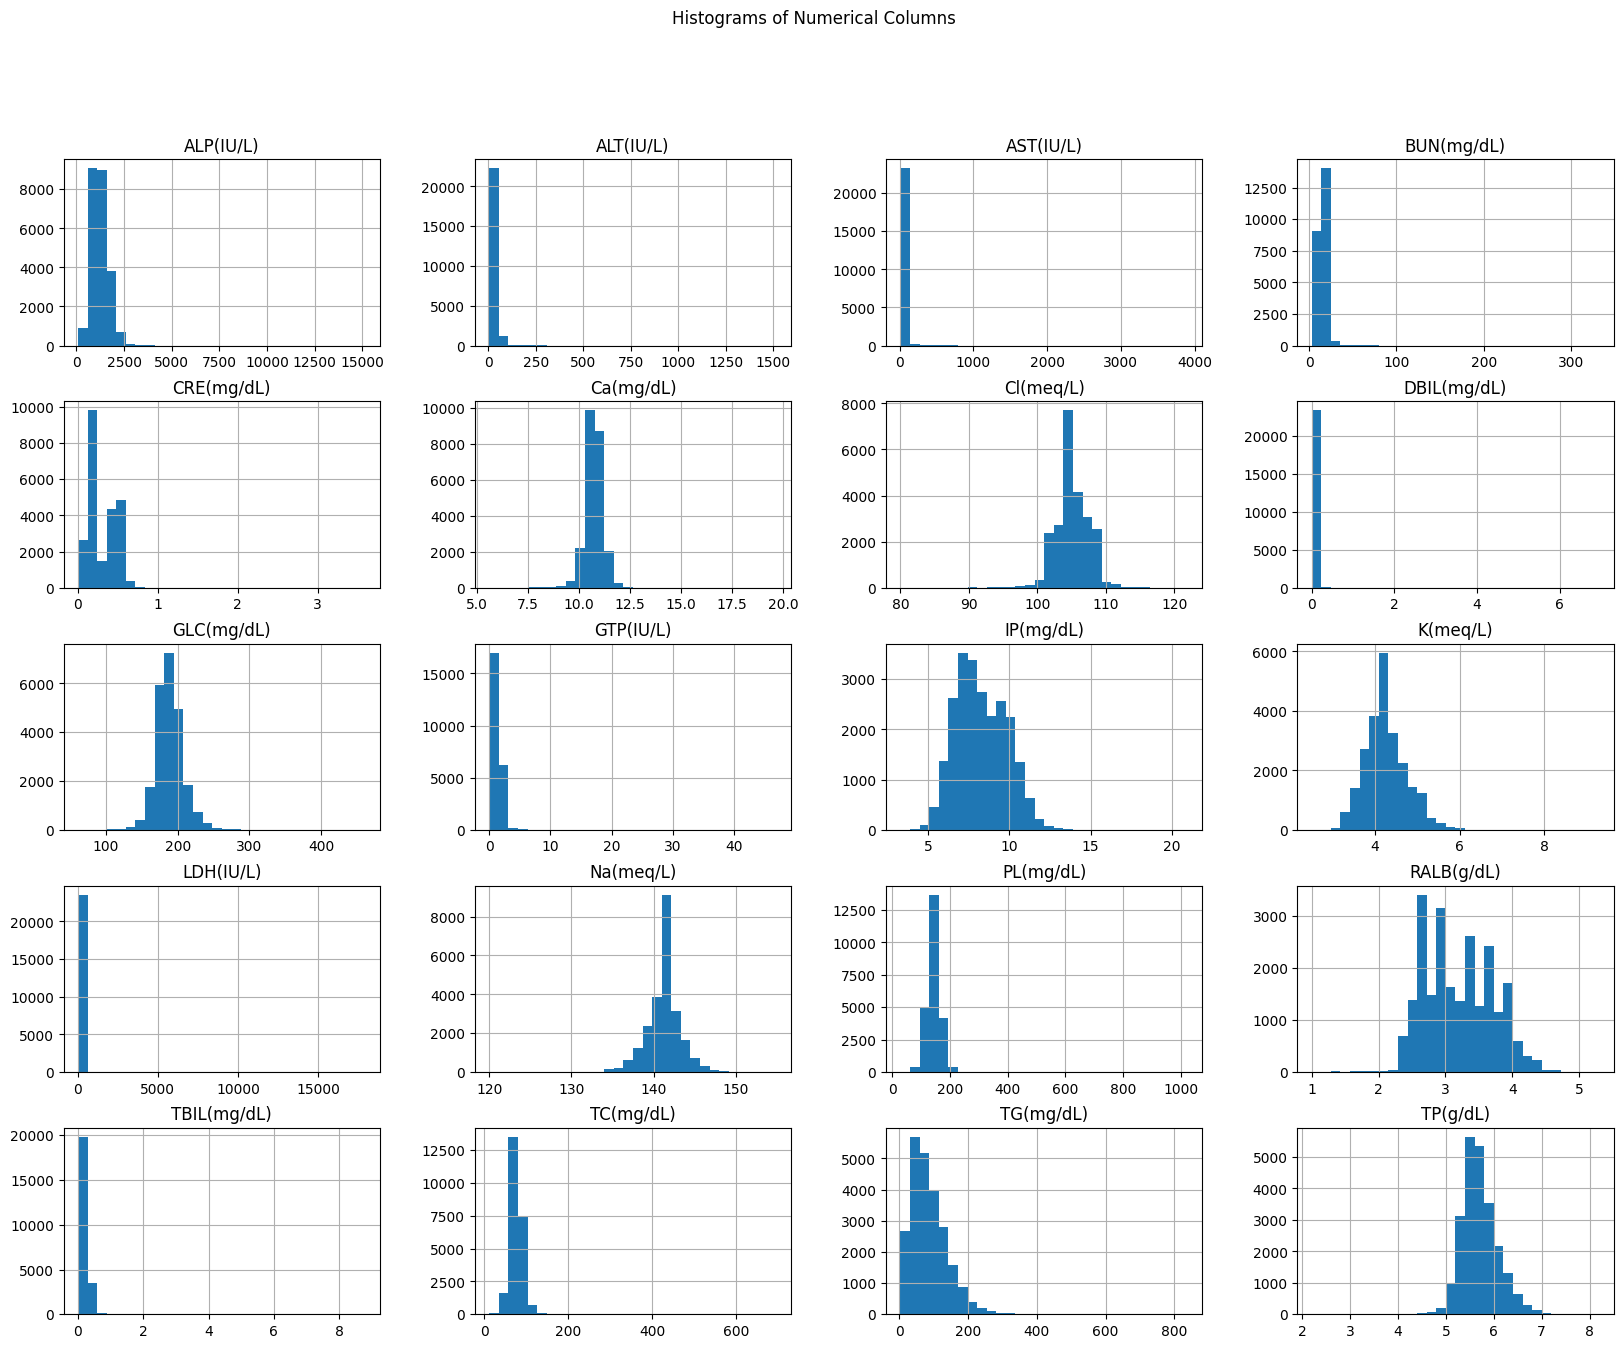

In [7]:
# Histograms for numerical data excluding EXP_ID, GROUP_ID, INDIVIDUAL_ID, and DOSE
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.difference(['EXP_ID', 'GROUP_ID', 'INDIVIDUAL_ID', 'DOSE', 'A/G'])
data[numerical_columns].hist(figsize=(20, 15), bins=30)
plt.suptitle('Histograms of Numerical Columns')
plt.show()


In [9]:
# Load the new data file for EDA
pathology_file_path = r'C:\Users\iamgu\Documents\GitHub\TCGA-LUAD\open_tggates_pathology.csv'
pathology_data = pd.read_csv(pathology_file_path, encoding='latin1')

# Display the first few rows and basic info of the new dataset for initial exploration
pathology_data_info = pathology_data.info()
pathology_data_head = pathology_data.head()

pathology_data_info, pathology_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12861 entries, 0 to 12860
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BARCODE           12861 non-null  object
 1   EXP_ID            12861 non-null  int64 
 2   GROUP_ID          12861 non-null  int64 
 3   INDIVIDUAL_ID     12861 non-null  int64 
 4   COMPOUND_NAME     12861 non-null  object
 5   DOSE_LEVEL        12861 non-null  object
 6   SACRIFICE_PERIOD  12861 non-null  object
 7   ORGAN             12861 non-null  object
 8   FINDING_TYPE      12825 non-null  object
 9   TOPOGRAPHY_TYPE   11042 non-null  object
 10  GRADE_TYPE        12861 non-null  object
 11  SP_FLG            12861 non-null  bool  
dtypes: bool(1), int64(3), object(8)
memory usage: 1.1+ MB


(None,
         BARCODE  EXP_ID  GROUP_ID  INDIVIDUAL_ID  \
 0   No ChipData     698         1              1   
 1   No ChipData     698         2              5   
 2  003017906001     698         5              1   
 3   No ChipData     698         5              2   
 4  003017906002     698         5              3   
 
                            COMPOUND_NAME DOSE_LEVEL SACRIFICE_PERIOD  ORGAN  \
 0  1% cholesterol + 0.25% sodium cholate    Control            4 day  Liver   
 1  1% cholesterol + 0.25% sodium cholate    Control            8 day  Liver   
 2  1% cholesterol + 0.25% sodium cholate       High            4 day  Liver   
 3  1% cholesterol + 0.25% sodium cholate       High            4 day  Liver   
 4  1% cholesterol + 0.25% sodium cholate       High            4 day  Liver   
 
           FINDING_TYPE TOPOGRAPHY_TYPE GRADE_TYPE  SP_FLG  
 0    Deposit, glycogen      Peripheral     slight    True  
 1    Deposit, glycogen      Peripheral     slight    True  
 2  Dege

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47672\1838281741.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


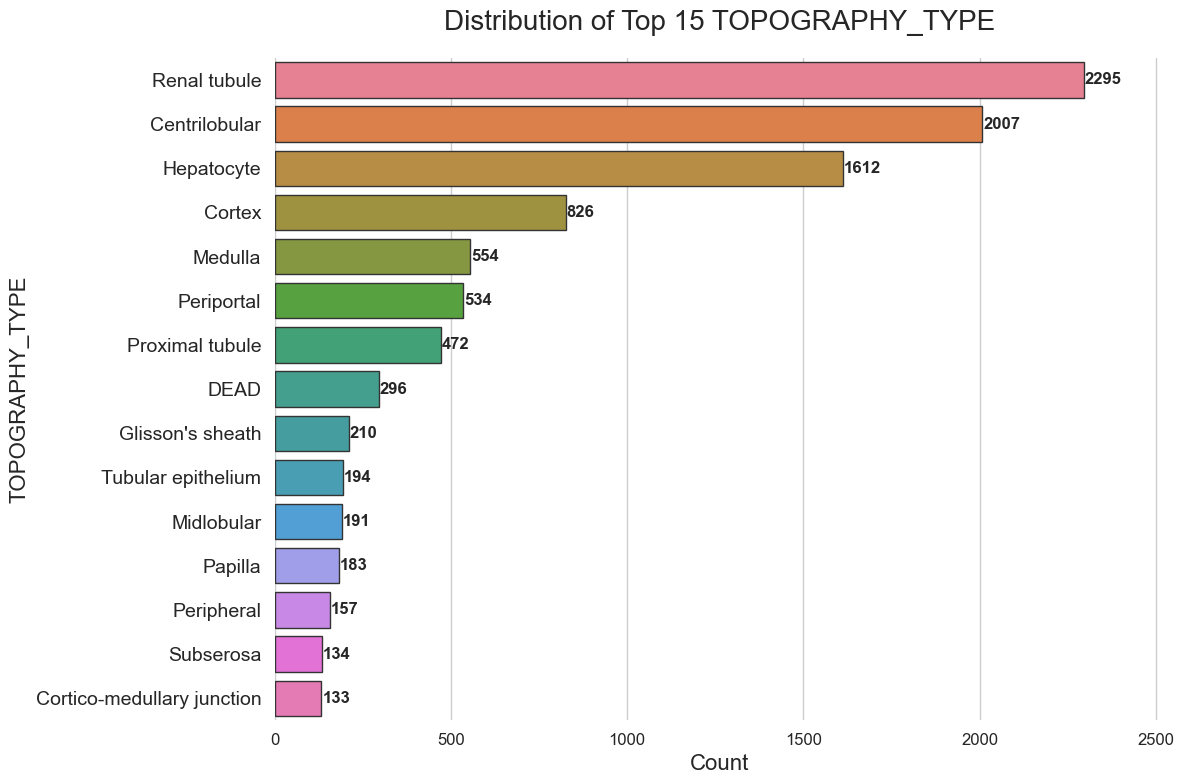

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 색상 팔레트 설정
colors = sns.color_palette("husl", 15)

# 폰트 설정
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 12  # 기본 폰트 크기 증가


# 그래프 크기 및 스타일 설정
plt.figure(figsize=(12, 8))  # 그래프 크기 축소
sns.set_style("whitegrid")

# 데이터 준비
top_15_topography = pathology_data['TOPOGRAPHY_TYPE'].value_counts().nlargest(15).index
top_15_data = pathology_data[pathology_data['TOPOGRAPHY_TYPE'].isin(top_15_topography)]

# 그래프 그리기
ax = sns.barplot(
    y='TOPOGRAPHY_TYPE', 
    x='count',
    data=top_15_data['TOPOGRAPHY_TYPE'].value_counts().reset_index(),
    palette=colors,
    edgecolor='.2'
)

# 제목 및 레이블 설정
plt.title('Distribution of Top 15 TOPOGRAPHY_TYPE', fontsize=20, pad=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('TOPOGRAPHY_TYPE', fontsize=16)

# 값 레이블 추가
for i, v in enumerate(top_15_data['TOPOGRAPHY_TYPE'].value_counts()):
    ax.text(v + 3, i, str(v), va='center', fontweight='bold')

# x축 범위 설정
plt.xlim(0, max(top_15_data['TOPOGRAPHY_TYPE'].value_counts()) * 1.1)

# y축 레이블 폰트 크기 조정
plt.yticks(fontsize=14)

# x축 레이블 폰트 크기 조정
plt.xticks(fontsize=12)

# 테두리 제거
sns.despine(left=True, bottom=True)

# 레이아웃 조정
plt.tight_layout()

plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_47672\330784873.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


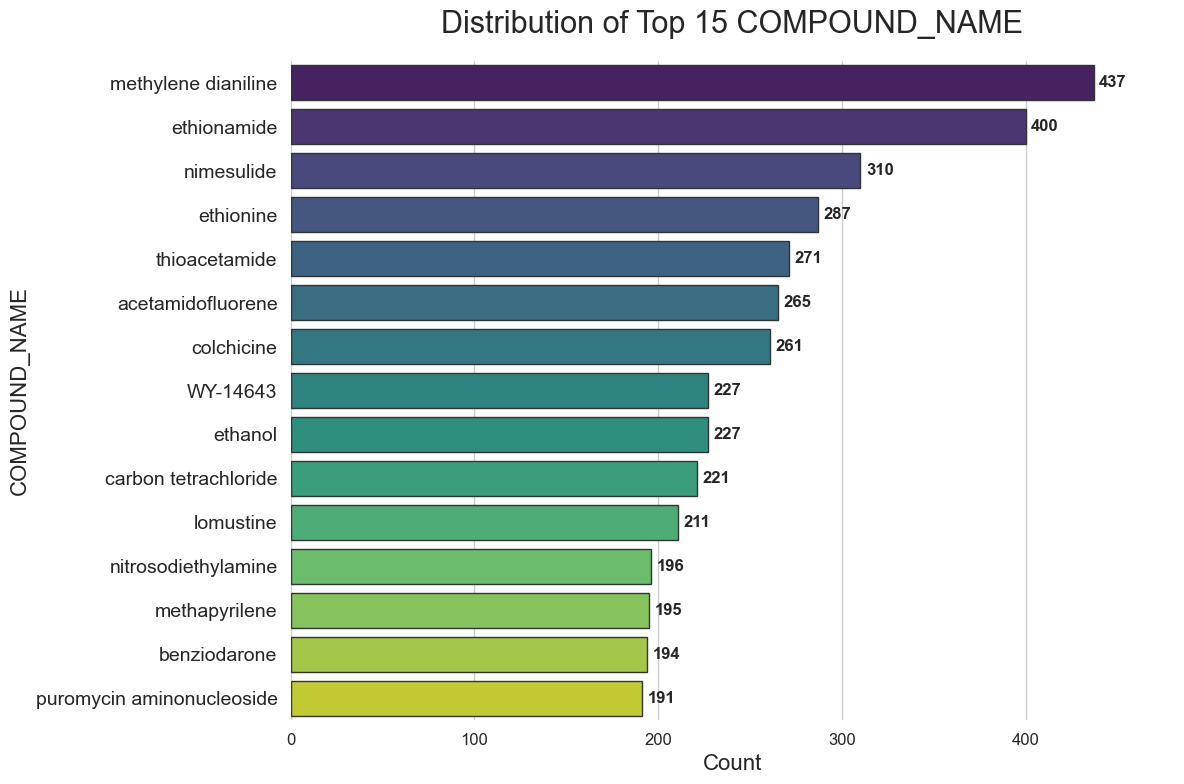

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 상위 15개의 COMPOUND_NAME만 선택
top_15_compounds = pathology_data['COMPOUND_NAME'].value_counts().nlargest(15)

# 색상 팔레트 설정
colors = sns.color_palette("viridis", 15)

# 폰트 설정
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 12  # 기본 폰트 크기 증가

# 그래프 크기 및 스타일 설정
plt.figure(figsize=(12, 8))  # 그래프 크기 축소
sns.set_style("whitegrid")

# 그래프 그리기
ax = sns.barplot(
    y=top_15_compounds.index,
    x=top_15_compounds.values,
    palette=colors,
    edgecolor='.2'
)

# 제목 및 레이블 설정
plt.title('Distribution of Top 15 COMPOUND_NAME', fontsize=22, pad=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('COMPOUND_NAME', fontsize=16)

# 값 레이블 추가
for i, v in enumerate(top_15_compounds):
    ax.text(v + 3, i, f'{v:,}', va='center', fontweight='bold', fontsize=12)

# x축 범위 설정
plt.xlim(0, max(top_15_compounds) * 1.1)

# y축 레이블 폰트 크기 조정
plt.yticks(fontsize=14)

# x축 레이블 폰트 크기 조정
plt.xticks(fontsize=12)

# 테두리 제거
sns.despine(left=True, bottom=True)

# 레이아웃 조정
plt.tight_layout()

plt.show()